In [37]:
import pandas as pd
from plotnine import *
pd.set_option('display.max_columns', 500)
import numpy as np

### I'm interested in evaluations (FCE) -- how much is the number of evaluations a source has related to poverty or race?

In [38]:
df = pd.read_csv("major-sources-demographic-043022.csv")

In [39]:
df.head()

,company,srn,address,city,zip_code,county,pti_no.,approved,notes,flag,full_address,oldest_permit_age,oldest_permit_age_converted,fce,vn,sar,major_sources_in_zip,total,income_poverty_level,white_pct,black_pct,am_indian_ak_native_pct,asian_pct,hi_pc_islander_pct,other_pct
0,MENASHA CORPORATION,A0023,320 N FARMER STREET,OTSEGO,49078,ALLEGAN,152-96B,2001-04-12,Rolled into ROP,0,"320 N FARMER STREET, OTSEGO, MI 49078",21.05,9.0,2.0,1.0,4.0,1,9316,10.7,94.5,0.7,0.1,0.6,0.0,4.1
1,MEAD PAPER COMPANY,A0884,7100 COUNTY ROAD 426,ESCANABA,49829,DELTA,800-88A,1998-04-23,Rolled into ROP,0,"7100 COUNTY ROAD 426, ESCANABA, MI 49829",24.02,9.0,3.0,4.0,3.0,2,16443,16.3,93.1,0.6,2.1,0.6,0.0,3.6
2,DELTA SOLID WASTE,N6035,5701 19TH AVENUE NORTH,ESCANABA,49829,DELTA,30-03,2003-04-17,Rolled into ROP,0,"5701 19TH AVENUE NORTH, ESCANABA, MI 49829",19.04,9.0,2.0,0.0,4.0,2,16443,16.3,93.1,0.6,2.1,0.6,0.0,3.6
3,GENERAL MOTORS CORPORATION,A1641,920 TOWNSEND STREET,LANSING,48933,INGHAM,69-84A,2000-12-19,Rolled into ROP,0,"920 TOWNSEND STREET, LANSING, MI 48933",21.36,9.0,4.0,0.0,5.0,1,2636,39.9,48.1,34.2,1.2,3.3,0.5,12.6
4,"KALSEC, INC",A1991,3713 W MAIN STREET,KALAMAZOO,49006,KALAMAZOO,104-95A,1997-01-16,Rolled into ROP,0,"3713 W MAIN STREET, KALAMAZOO, MI 49005",25.28,9.0,3.0,1.0,3.0,1,24556,36.4,74.0,14.4,0.2,4.0,0.0,7.5


In [40]:
df['fce_goal'] = df.oldest_permit_age_converted / 2

In [41]:
df.fce_goal = df.fce_goal.apply(np.floor)

In [42]:
df['fce_difference'] = df.fce - df.fce_goal

In [43]:
df.sort_values('oldest_permit_age_converted', ascending=True)

,company,srn,address,city,zip_code,county,pti_no.,approved,notes,flag,full_address,oldest_permit_age,oldest_permit_age_converted,fce,vn,sar,major_sources_in_zip,total,income_poverty_level,white_pct,black_pct,am_indian_ak_native_pct,asian_pct,hi_pc_islander_pct,other_pct,fce_goal,fce_difference
245,PANHANDLE EASTERN PIPE LINE,N5572,3990 CROOKED LAKE ROAD,HOWELL,48843,LIVINGSTON,72-20,2020-09-02,Rolled into ROP,0,"3990 CROOKED LAKE ROAD, HOWELL, MI 48843",1.66,1.66,3.0,0.0,3.0,1,44707,5.2,95.9,0.5,0.2,1.0,0.2,2.2,0.0,3.0
216,ENERGY DEVELOPMENTS BYRON,N1324,10300 S KENT DRIVE SW,BYRON CENTER,49315,KENT,212-08B,2020-05-28,Rolled into ROP,0,"10300 S KENT DRIVE SW, BYRON CENTER, MI 49315",1.92,1.92,5.0,0.0,4.0,2,23148,3.3,91.3,1.4,0.5,3.6,0.0,3.2,0.0,5.0
21,DDP SPECIALTY ELECTRONIC,P1027,954 BUILDING,MIDLAND,48640,MIDLAND,159-19,2020-03-23,Rolled into ROP,0,"954 BUILDING, MIDLAND, MI 48674",2.10,2.10,0.0,2.0,4.0,6,31553,11.9,93.4,1.9,0.2,1.9,0.1,2.5,1.0,-1.0
15,DDP SPECIALTY ELECTRONIC,P1027,3400 S SAGINAW ROAD,MIDLAND,48667,MIDLAND,167-19,2020-01-27,Rolled into ROP,0,"3400 S SAGINAW ROAD, MIDLAND, MI 48667",2.26,2.26,0.0,2.0,4.0,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,-1.0
200,MOLDED PLASTIC INDUSTRIES,N0034,2382 JARCO DRIVE,HOLT,48842,INGHAM,106-18,2018-11-05,Rolled into ROP,0,"2382 JARCO DRIVE, HOLT, MI 48842",3.48,3.48,1.0,0.0,3.0,1,21877,11.6,82.8,7.4,0.2,4.2,0.0,5.3,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,HOWARD PLATING INDUSTRIES,B2363,32565 DEQUINDRE ROAD,MADISON HEIGHTS,48071,OAKLAND,460-97,1997-11-18,Rolled into ROP,0,"32565 DEQUINDRE ROAD, MADISON HEIGHTS, MI 48071",24.45,9.00,3.0,3.0,5.0,1,29964,13.6,80.8,8.5,0.4,5.8,0.0,4.5,4.0,-1.0
96,U S GYPSUM COMPANY,B3518,2 DIVISION STREET,RIVER ROUGE,48218,WAYNE,183-98,2000-02-15,Rolled into ROP,0,"2 DIVISION STREET, RIVER ROUGE, MI 48218",22.20,9.00,3.0,1.0,3.0,4,7502,42.2,41.3,48.9,0.4,0.0,0.0,9.5,4.0,-1.0
95,"B P PRODUCTS NORTH AMERICA,",B2987,205 MARION AVENUE,RIVER ROUGE,48218,WAYNE,246-96,1999-05-21,Rolled into ROP,0,"205 MARION AVENUE, RIVER ROUGE, MI 48218",22.94,9.00,4.0,2.0,5.0,4,7502,42.2,41.3,48.9,0.4,0.0,0.0,9.5,4.0,0.0
102,DAIMLERCHRYSLER CORPORATION,B2757,22800 MOUND ROAD,WARREN,48091,MACOMB,194-01,2001-07-19,Rolled into ROP,0,"22800 MOUND ROAD, WARREN, MI 48091",20.78,9.00,4.0,0.0,5.0,2,29667,27.7,55.0,23.8,1.1,16.2,0.0,4.0,4.0,0.0


<AxesSubplot:>

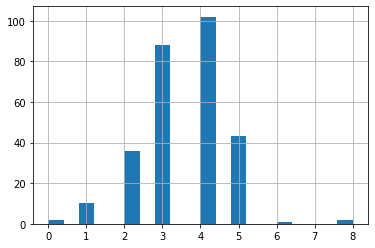

In [44]:
df.fce.hist(bins=20)

<AxesSubplot:>

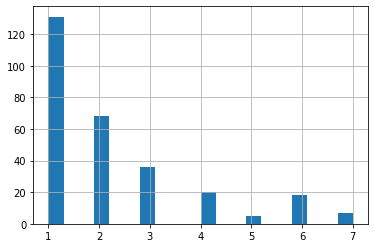

In [45]:
df.major_sources_in_zip.hist(bins=20)

In [46]:
# Making a dataframe of fce per zip code
df_zip = df.groupby('zip_code').fce.sum().to_frame().reset_index()

In [47]:
df_zip

,zip_code,fce
0,48005,1.0
1,48006,3.0
2,48014,5.0
3,48023,2.0
4,48040,10.0
...,...,...
182,49871,3.0
183,49876,3.0
184,49881,4.0
185,49946,3.0


In [48]:
# Adding up the total number of FCE's that would be the goal for that zip code
df_zip = df_zip.merge(df.groupby('zip_code').fce_goal.sum().to_frame().reset_index(),how="left",left_on='zip_code',right_on='zip_code')

In [49]:
# What's the difference between total and goal?
df_zip['fce_difference'] = df_zip.fce - df_zip.fce_goal

In [50]:
# What's the average age of a permit in that zip code
df_zip = df.groupby('zip_code').oldest_permit_age_converted.mean().to_frame().reset_index().merge(df_zip,how="outer",left_on='zip_code',right_on='zip_code')
# Renaming to average age
df_zip = df_zip.rename({'oldest_permit_age_converted':'average_age_permit'},axis=1)

In [51]:
# Getting the demographics for each zip
df_zip_demo = df.drop_duplicates(subset='zip_code').drop(['company','srn','address','city','pti_no.','approved','notes','oldest_permit_age','fce_difference','oldest_permit_age_converted','oldest_permit_age','fce','fce_goal','fce_difference'],axis=1)

In [52]:
# Adding demographics to zip dataframe
df_zip = df_zip_demo.merge(df_zip,how='outer',left_on='zip_code',right_on='zip_code')

/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


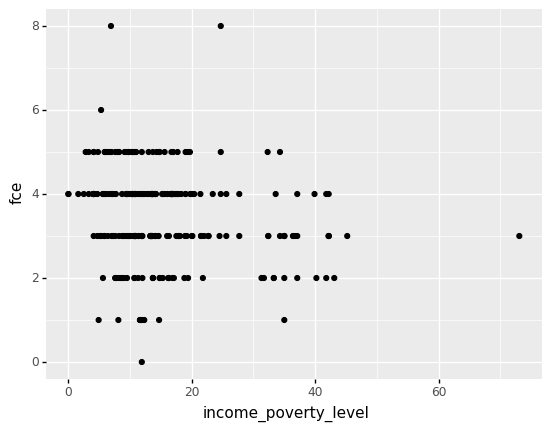

<ggplot: (334561097)>

In [53]:
(
    ggplot(df,
          aes(x='income_poverty_level',y='fce'))
        + geom_point()
)

/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


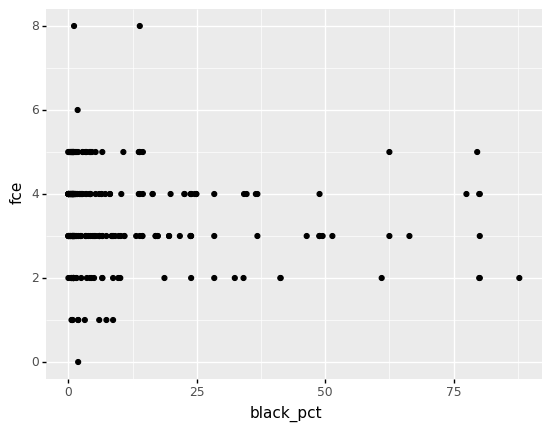

<ggplot: (334436940)>

In [54]:
(
    ggplot(df,
          aes(x='black_pct',y='fce'))
        + geom_point()
)

/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


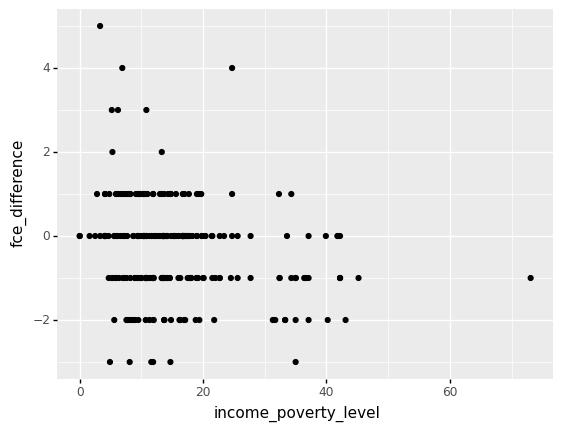

<ggplot: (334634006)>

In [55]:
(
    ggplot(df,
          aes(x='income_poverty_level',y='fce_difference'))
        + geom_point()
)

/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


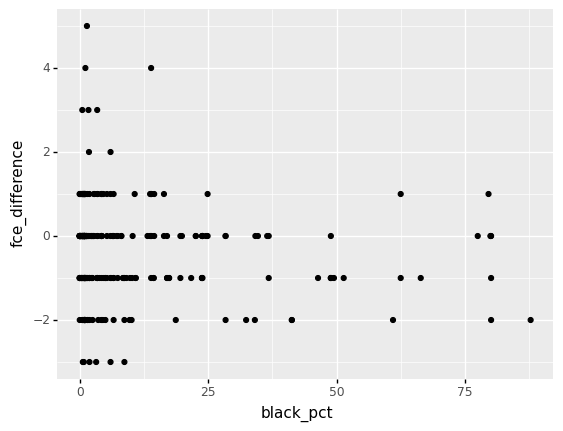

<ggplot: (334261315)>

In [56]:
(
    ggplot(df,
          aes(x='black_pct',y='fce_difference'))
        + geom_point()
)

/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


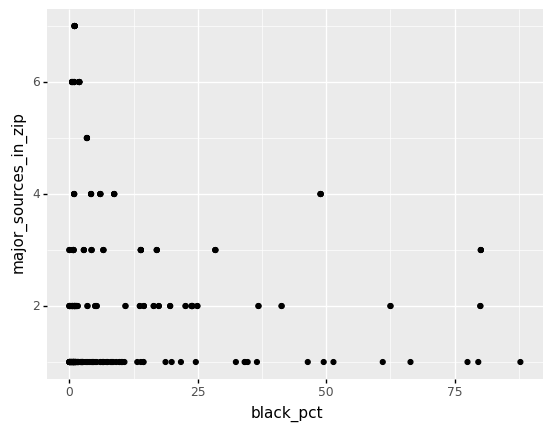

<ggplot: (334101619)>

In [57]:
(
    ggplot(df,
          aes(x='black_pct',y='major_sources_in_zip'))
        + geom_point()
)

/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


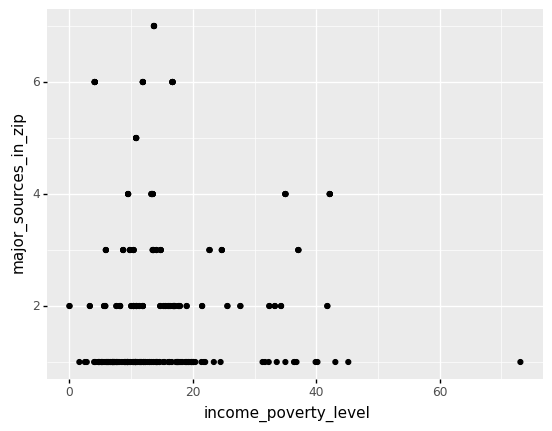

<ggplot: (334551230)>

In [58]:
(
    ggplot(df,
          aes(x='income_poverty_level',y='major_sources_in_zip'))
        + geom_point()
)

In [59]:
df.corr().round(2)

,zip_code,flag,oldest_permit_age,oldest_permit_age_converted,fce,vn,sar,major_sources_in_zip,total,income_poverty_level,white_pct,black_pct,am_indian_ak_native_pct,asian_pct,hi_pc_islander_pct,other_pct,fce_goal,fce_difference
zip_code,1.00,NaN,0.05,-0.04,0.15,-0.19,-0.03,0.24,-0.15,-0.18,0.34,-0.32,0.36,-0.29,-0.06,-0.09,-0.04,0.17
flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldest_permit_age,0.05,NaN,1.00,0.66,0.08,0.11,0.12,0.04,-0.15,0.14,0.03,-0.02,0.02,-0.09,0.03,0.02,0.65,-0.26
oldest_permit_age_converted,-0.04,NaN,0.66,1.00,0.24,0.05,0.04,-0.07,-0.13,0.09,0.00,-0.00,0.06,-0.01,-0.04,-0.00,0.99,-0.29
fce,0.15,NaN,0.08,0.24,1.00,-0.11,0.03,-0.05,-0.02,-0.18,0.12,-0.11,0.01,-0.02,-0.12,-0.06,0.22,0.86
vn,-0.19,NaN,0.11,0.05,-0.11,1.00,0.30,-0.05,0.06,0.16,-0.19,0.15,-0.02,0.06,0.17,0.27,0.06,-0.14
sar,-0.03,NaN,0.12,0.04,0.03,0.30,1.00,0.16,0.02,-0.00,0.00,-0.02,-0.03,0.03,0.10,0.06,0.04,0.01
major_sources_in_zip,0.24,NaN,0.04,-0.07,-0.05,-0.05,0.16,1.00,0.22,-0.00,0.07,-0.07,-0.09,-0.03,-0.01,0.02,-0.06,-0.02
total,-0.15,NaN,-0.15,-0.13,-0.02,0.06,0.02,0.22,1.00,-0.08,-0.16,0.07,-0.16,0.31,-0.01,0.18,-0.13,0.06
income_poverty_level,-0.18,NaN,0.14,0.09,-0.18,0.16,-0.00,-0.00,-0.08,1.00,-0.69,0.65,0.06,0.07,0.14,0.51,0.09,-0.22


# Regressions

In [60]:
### ODD That a negative relationship shows up -- the longer the permit, the lower the rate of fce_per_year
import statsmodels.formula.api as smf
model = smf.ols("fce_difference ~ income_poverty_level", data=df_zip)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         fce_difference   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     11.55
Date:                Sat, 30 Apr 2022   Prob (F-statistic):           0.000831
Time:                        15:55:17   Log-Likelihood:                -344.31
No. Observations:                 185   AIC:                             692.6
Df Residuals:                     183   BIC:                             699.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0705      0.205      0.343      0.732      -0.335       0.476
income_poverty_level    -0.0386      0.011     -3.399      0.001      -0.061      -0.016
==============================================================================
Omnibus:                       27.143   Durbin-Watson:                   1.581
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.455
Skew:                          -0.423   Prob(JB):                     4.64e-24
Kurtosis:                       6.637   Cond. No.                         32.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_bin : Removed 1 rows containing non-finite values.
/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


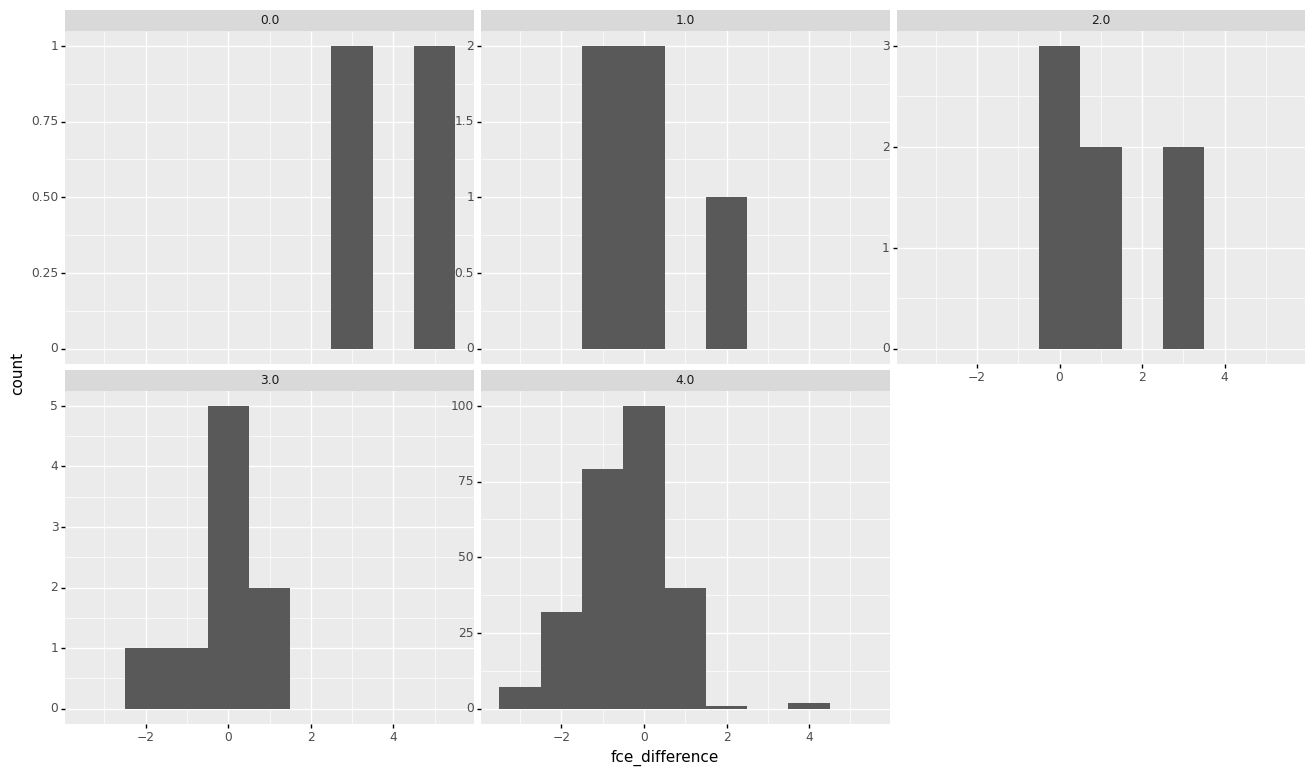

<ggplot: (334690612)>

In [61]:
(
    ggplot(df, aes(x='fce_difference')) + 
        geom_histogram( bins=9) +
        facet_wrap('fce_goal', scales='free_y') + 
        theme(figure_size=(16,9))
)


In [62]:
model = smf.ols("fce ~ major_sources_in_zip", data=df_zip)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fce   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     795.4
Date:                Sat, 30 Apr 2022   Prob (F-statistic):           6.65e-69
Time:                        15:55:18   Log-Likelihood:                -362.23
No. Observations:                 187   AIC:                             728.5
Df Residuals:                     185   BIC:                             734.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.2029      0.219      0.927      0.355      -0.229       0.635
major_sources_in_zip     3.3441      0.119     28.202      0.000       3.110       3.578
==============================================================================
Omnibus:                       50.308   Durbin-Watson:                   1.474
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              412.309
Skew:                          -0.698   Prob(JB):                     2.94e-90
Kurtosis:                      10.139   Cond. No.                         3.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# The two mysterious locations have now dropped off this residual because they are no longer in the dataset
df_zip.assign(residuals = results.resid,
             residuals_z = results.resid / results.resid.std()
).sort_values(by='residuals').query('fce.notnull()')

,zip_code,county,flag,full_address,vn,sar,major_sources_in_zip,total,income_poverty_level,white_pct,black_pct,am_indian_ak_native_pct,asian_pct,hi_pc_islander_pct,other_pct,average_age_permit,fce,fce_goal,fce_difference,residuals,residuals_z
7,48667,MIDLAND,0,"1000 BUILDING, MIDLAND, MI 48667",2.0,25.0,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.766667,1.0,8.0,-7.0,-9.235130,-5.485973
8,48640,MIDLAND,0,"100 BUILDING, MIDLAND, MI 48674",2.0,25.0,6,31553,11.9,93.4,1.9,0.2,1.9,0.1,2.5,7.491667,13.0,20.0,-7.0,-7.267404,-4.317078
21,48120,WAYNE,0,"3001 MILLER ROAD, DEARBORN, MI 48120",24.0,10.0,4,7050,35.0,76.7,8.7,0.1,8.0,0.0,6.5,9.000000,9.0,16.0,-7.0,-4.579221,-2.720209
17,48229,WAYNE,0,"1 QUALITY DRIVE, ECORSE, MI 48229",31.0,13.0,2,9404,33.3,39.8,41.3,2.4,0.0,1.1,15.4,9.000000,4.0,8.0,-4.0,-2.891038,-1.717372
91,48359,OAKLAND,0,"4555 GIDDINGS ROAD, ORION, MI 48359",0.0,1.0,1,9695,8.1,83.2,6.0,0.6,5.5,0.0,4.7,9.000000,1.0,4.0,-3.0,-2.546947,-1.512971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,48065,MACOMB,0,"74000 VAN DYKE ROAD, ROMEO, MI 48065",3.0,5.0,3,11002,5.9,93.3,2.8,0.0,1.3,0.0,2.6,9.000000,14.0,12.0,2.0,3.764870,2.236458
55,49460,OTTAWA,0,"17000 CROSWELL STREET, WEST OLIVE, MI 49460",1.0,9.0,1,8610,6.9,94.8,1.1,0.3,0.6,0.0,3.3,9.000000,8.0,4.0,4.0,4.453053,2.645261
12,49464,OTTAWA,0,"725 E MAIN STREET, ZEELAND, MI 49464",0.0,6.0,6,28804,4.1,91.3,0.9,0.3,4.1,0.0,3.3,8.740000,25.0,23.0,2.0,4.732596,2.811319
70,49646,KALKASKA,0,"1510 THOMAS ROAD, KALKASKA, MI 49646",0.0,5.0,6,8157,16.7,95.9,0.5,0.8,0.7,0.0,2.1,9.000000,25.0,24.0,1.0,4.732596,2.811319


In [65]:
model = smf.ols("major_sources_in_zip ~ black_pct", data=df_zip)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     major_sources_in_zip   R-squared:                       0.001
Model:                              OLS   Adj. R-squared:                 -0.004
Method:                   Least Squares   F-statistic:                    0.1760
Date:                  Sat, 30 Apr 2022   Prob (F-statistic):              0.675
Time:                          15:55:44   Log-Likelihood:                -269.71
No. Observations:                   185   AIC:                             543.4
Df Residuals:                       183   BIC:                             549.9
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5005      0.089     16.945      0.000       1.326       1.675
black_pct      0.0019      0.004      0.419      0.675      -0.007       0.011
==============================================================================
Omnibus:                      129.550   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              828.554
Skew:                           2.780   Prob(JB):                    1.21e-180
Kurtosis:                      11.750   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""